This is a data analysis and data visualisation project using data from TV MAZE API. The purpose of this project is to analyse the TV shows and their respective data, to produce useful and meaningful visualisations and insights.
For this analysis, I extracted the list of TV shows along with their types, languages, genres, premier date, networks and ratings. I will be using these features to carryout meaningful analysis.

## Retrieving data 



#### Importing the required libraries 

In [54]:
import requests
import json
import pandas as pd
import ast
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


**<font color='Red'>Identifying the suitable API</font>**


A single is chosen for this assignment. The API is provided by **http://www.tvmaze.com/**

TVMAZE provides a REST API that returns a JSON.

API calls are rate limited to allow at least 20 calls every 10 seconds per IP address. If the rate is exceeded, we might get HTTP 429 error.

Using python's request library. We are using the GET method, to retrieve data from a specific resource.


TV Maze API - **http://api.tvmaze.com/shows**

Retrieveing the data using the API.

##### **<font color='Red'>Data Collection</font>**

**data_request** function is used to collect the data from the API as JSON and the converted in a dataframe using pandas. The dataframe is saved as a CSV file using pandas.



In [60]:
#function to call the API, retreive the csv data, and write to a file

def data_request(link):
    
    result = requests.get(link)
    result.status_code
    if result.status_code == 200:
        data = result.json()
        print("\n Data is retrieved sucessfully. \n")
        
        df = pd.DataFrame.from_records(data)
        df.to_csv('tvmazedata.csv', encoding='utf-8', index=False) 
        print(df.head())
    else:
        print("\n ERROR")

In [61]:
data_request("http://api.tvmaze.com/shows?format=json")  #function call


 Data is retrieved sucessfully. 

   id                                               url                name  \
0   1      http://www.tvmaze.com/shows/1/under-the-dome      Under the Dome   
1   2  http://www.tvmaze.com/shows/2/person-of-interest  Person of Interest   
2   3              http://www.tvmaze.com/shows/3/bitten              Bitten   
3   4               http://www.tvmaze.com/shows/4/arrow               Arrow   
4   5      http://www.tvmaze.com/shows/5/true-detective      True Detective   

       type language                              genres            status  \
0  Scripted  English  [Drama, Science-Fiction, Thriller]             Ended   
1  Scripted  English    [Action, Crime, Science-Fiction]             Ended   
2  Scripted  English            [Drama, Horror, Romance]             Ended   
3  Scripted  English    [Drama, Action, Science-Fiction]             Ended   
4  Scripted  English            [Drama, Crime, Thriller]  To Be Determined   

   runtime   premiere

NameError: name 'df' is not defined

## Loading the dataset

Loading the CSV file,**"tvmazedata.csv"**, and displaying top 5 rows of the dataset.

We will apply the necessary pre processing steps to clean and filter the dataset, so that it can be used for data analysis. 

In [53]:
df1 = pd.read_csv('tvmazedata.csv', index_col=False)  
df1.head(5) 

,id,url,name,type,language,genres,status,runtime,premiered,officialSite,schedule,rating,weight,network,webChannel,externals,image,summary,updated,_links
0,1,http://www.tvmaze.com/shows/1/under-the-dome,Under the Dome,Scripted,English,"['Drama', 'Science-Fiction', 'Thriller']",Ended,60.0,2013-06-24,http://www.cbs.com/shows/under-the-dome/,"{'time': '22:00', 'days': ['Thursday']}",{'average': 6.5},97,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",NaN,"{'tvrage': 25988, 'thetvdb': 264492, 'imdb': '...",{'medium': 'http://static.tvmaze.com/uploads/i...,<p><b>Under the Dome</b> is the story of a sma...,1573667713,{'self': {'href': 'http://api.tvmaze.com/shows...
1,2,http://www.tvmaze.com/shows/2/person-of-interest,Person of Interest,Scripted,English,"['Action', 'Crime', 'Science-Fiction']",Ended,60.0,2011-09-22,http://www.cbs.com/shows/person_of_interest/,"{'time': '22:00', 'days': ['Tuesday']}",{'average': 8.9},95,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",NaN,"{'tvrage': 28376, 'thetvdb': 248742, 'imdb': '...",{'medium': 'http://static.tvmaze.com/uploads/i...,<p>You are being watched. The government has a...,1588773151,{'self': {'href': 'http://api.tvmaze.com/shows...
2,3,http://www.tvmaze.com/shows/3/bitten,Bitten,Scripted,English,"['Drama', 'Horror', 'Romance']",Ended,60.0,2014-01-11,http://bitten.space.ca/,"{'time': '22:00', 'days': ['Friday']}",{'average': 7.5},88,"{'id': 7, 'name': 'CTV Sci-Fi Channel', 'count...",NaN,"{'tvrage': 34965, 'thetvdb': 269550, 'imdb': '...",{'medium': 'http://static.tvmaze.com/uploads/i...,<p>Based on the critically acclaimed series of...,1603936716,{'self': {'href': 'http://api.tvmaze.com/shows...
3,4,http://www.tvmaze.com/shows/4/arrow,Arrow,Scripted,English,"['Drama', 'Action', 'Science-Fiction']",Ended,60.0,2012-10-10,http://www.cwtv.com/shows/arrow,"{'time': '21:00', 'days': ['Tuesday']}",{'average': 7.4},98,"{'id': 5, 'name': 'The CW', 'country': {'name'...",NaN,"{'tvrage': 30715, 'thetvdb': 257655, 'imdb': '...",{'medium': 'http://static.tvmaze.com/uploads/i...,"<p>After a violent shipwreck, billionaire play...",1610268322,{'self': {'href': 'http://api.tvmaze.com/shows...
4,5,http://www.tvmaze.com/shows/5/true-detective,True Detective,Scripted,English,"['Drama', 'Crime', 'Thriller']",To Be Determined,60.0,2014-01-12,http://www.hbo.com/true-detective,"{'time': '21:00', 'days': ['Sunday']}",{'average': 8.3},97,"{'id': 8, 'name': 'HBO', 'country': {'name': '...",NaN,"{'tvrage': 31369, 'thetvdb': 270633, 'imdb': '...",{'medium': 'http://static.tvmaze.com/uploads/i...,<p>Touch darkness and darkness touches you bac...,1612060351,{'self': {'href': 'http://api.tvmaze.com/shows...


In [63]:
df1.shape

(240, 20)

## Data Pre-Processing 

The following code is used to clean and filter the data. This data will be used futher for data analysis.

**<font color='red'>Dropping the columns that are not required:</font>**

There are 20 columns in the dataset. The columns that are not required will be dropped from the dataset.


Dropping these columns, **'id', 'url', 'officialSite', 'schedule', 'webChannel', '_links', 'image', 'weight', 'updated', 'webChannel', 'externals', 'summary'**, as they will not be required for data analysis.

In [64]:
df1.drop(['id', '_links', 'url', 'officialSite', 'externals', 'schedule', 'image', 'weight', 'updated', 'webChannel', 'summary', 'webChannel'], axis=1, inplace=True)
df1.head()

,name,type,language,genres,status,runtime,premiered,rating,network
0,Under the Dome,Scripted,English,"['Drama', 'Science-Fiction', 'Thriller']",Ended,60.0,2013-06-24,{'average': 6.5},"{'id': 2, 'name': 'CBS', 'country': {'name': '..."
1,Person of Interest,Scripted,English,"['Action', 'Crime', 'Science-Fiction']",Ended,60.0,2011-09-22,{'average': 8.9},"{'id': 2, 'name': 'CBS', 'country': {'name': '..."
2,Bitten,Scripted,English,"['Drama', 'Horror', 'Romance']",Ended,60.0,2014-01-11,{'average': 7.5},"{'id': 7, 'name': 'CTV Sci-Fi Channel', 'count..."
3,Arrow,Scripted,English,"['Drama', 'Action', 'Science-Fiction']",Ended,60.0,2012-10-10,{'average': 7.4},"{'id': 5, 'name': 'The CW', 'country': {'name'..."
4,True Detective,Scripted,English,"['Drama', 'Crime', 'Thriller']",To Be Determined,60.0,2014-01-12,{'average': 8.3},"{'id': 8, 'name': 'HBO', 'country': {'name': '..."


In [65]:
df1.shape

(240, 9)

The dataset now consists of 9 columns.

- **"rating"** column conists of a dictionary that has a "rating" as the key. We will extract the value for the key and put it in a new column

- Similarly, **"network"** column consists of a dictionary that has various key value pairs. We will extract the value of key "name" from the Dictionary and put it in a new columns. 



**<font color='Red'>Handling missing values:</font>**

To look for columns that has missing values and fill it with appropriate values. 



In [6]:
null_columns=df1.columns[df1.isnull().any()]  

runtime    2
network    7
dtype: int64

The **"network"** column is a catagorical feature. It has 7 missing values. We don't know what the missing values can be, we will fill it with **{'name':'Others'}**. 

In [7]:
df1["network"].fillna("{'name':'Others'}", inplace = True) 

In [8]:
df1.iloc[31]  #Checking if the values are updated

name                           Hemlock Grove
type                                Scripted
language                             English
genres       ['Drama', 'Horror', 'Thriller']
status                                 Ended
runtime                                  NaN
premiered                         2013-04-19
rating                        {'average': 7}
network                    {'name':'Others'}
Name: 31, dtype: object

The values in **"network"** column are in the form of a dictionary consisting of key value pairs.

Extracting the value of key called "name" from the dictionary and putting it in a new column **"Show_network"**.

In [9]:
df1["network"][:5]  #Displaying the network column

0    {'id': 2, 'name': 'CBS', 'country': {'name': '...
1    {'id': 2, 'name': 'CBS', 'country': {'name': '...
2    {'id': 7, 'name': 'CTV Sci-Fi Channel', 'count...
3    {'id': 5, 'name': 'The CW', 'country': {'name'...
4    {'id': 8, 'name': 'HBO', 'country': {'name': '...
Name: network, dtype: object

The "name" key contains the name of the network of the shows. We will extract the value of this key and put it in a new column, **"Show_network"**

In [10]:
net = []
for i in df1.loc[0:]["network"]:
    res = ast.literal_eval(i)
    net.append(res["name"])
    
df1["Show_network"] = net      

In [11]:
df1.drop('network', axis=1, inplace=True) #Dropping the "network" column

In [12]:
df1["Show_network"][:5]

0                   CBS
1                   CBS
2    CTV Sci-Fi Channel
3                The CW
4                   HBO
Name: Show_network, dtype: object

**"Show_network"** column now consists of the names of networks for the shows.

Similarly, the values in **"rating"** column are in the form of a dictionary consisting of key value pair.

Extracting the value of key called "rating" from the dictionary and putting it in a new column **"Show_rating"**.

In [13]:
df1["rating"][:5]  #Displaying the rating column

0    {'average': 6.5}
1    {'average': 8.9}
2    {'average': 7.5}
3    {'average': 7.4}
4    {'average': 8.3}
Name: rating, dtype: object

The "rating" key consists of the rating for the shows. We will extract the value of this key and put it in a new column, **"Show_rating"**.

In [14]:
net_2 = []
for i in df1.loc[0:]["rating"]:
    res_2 = ast.literal_eval(i)
    net_2.append(res_2["average"])
df1["Show_rating"] = net_2

In [15]:
df1["Show_rating"][:5]

0    6.5
1    8.9
2    7.5
3    7.4
4    8.3
Name: Show_rating, dtype: float64

**"Show_rating"** column now consists of the rating for the shows.

In [16]:
df1.drop('rating', axis=1, inplace =True) #Dropping the column

Getting the count of missing values in the column **"Show_rating"**.

In [17]:
null_columns=df1.columns[df1.isnull().any()]  #To check which column has null values. Also getting the count
df1[null_columns].isnull().sum()

runtime        2
Show_rating    5
dtype: int64

There are 6 missing values in the column **"rating"**. We will calculate the average of all the ratings in the column, and fill the missing values.

In [18]:
avg = round(df1["Show_rating"].mean(), 2)  #Calculating the average of all ratings
df1["Show_rating"].fillna(avg, inplace = True) 

Filled the missing values with the average of all the rating in the column.

**<font color='Red'>Futher Data Modification:</font>**

- The column **"Show_Raing"** consists of floating point numbers.
- For analysis purposes, we will round off the values and store it in a new column.


Rounding off the values in **"Show_rating"** column and putting the values in a new column, **"Show_rating_round"**.

In [19]:
df1["Show_rating_round"] = df1["Show_rating"].round()

In [20]:
df1.drop('Show_rating', axis=1, inplace=True)  #Dropping the column

The column **"genres"** has **"[ ]"** as values. 

Replacing **"[ ]"** with **"['Others']"** in **"genres"** columns.

In [21]:
df1["genres"].replace({"[]": "['Others']",}, inplace=True)

In [22]:
df1.iloc[95]  #Checking if the value is updated

name                 America's Next Top Model
type                                  Reality
language                              English
genres                             ['Others']
status                                  Ended
runtime                                    60
premiered                          2003-05-20
Show_network                              VH1
Show_rating_round                           6
Name: 95, dtype: object

The column **"premiered"** consists of dates when the shows was premiered. The values are string.

We will convert the convert string date time into Python Date time object using pandas' to_datetime() funtion. 

In [23]:
df1['premiered'] = pd.to_datetime(df1['premiered'], infer_datetime_format=True)  #Coverts string datetime into python date time object
df1['Show_premiered'] = df1['premiered'].dt.year  #Column consists of years when the show was released

The string date time is converted into python date time object. The column **"premiered"** consists of values in **datetime64** datatype. 

The new column **"Show_premiered"** consists of the years when the resepctive show was released. 



**<font color='Red'>Final Check for missing values:</font>**

To check if all the values are updated and if any column still has missing values.


In [24]:
x = df1.isnull().sum()
for i,j in x.items():
    if j == 0:
        print("\n No null values in", i , "column")  #to check if any column still have null values


 No null values in name column

 No null values in type column

 No null values in language column

 No null values in genres column

 No null values in status column

 No null values in premiered column

 No null values in Show_network column

 No null values in Show_rating_round column

 No null values in Show_premiered column


**<font color='Red'>Saving the cleaned dataset:</font>**

The cleaned dataset will be saved in a new CSV file. The new CSV file named **"tvmazedata_cleaned.csv"**

In [25]:
df1.to_csv("tvmazedata_cleaned.csv", encoding='utf-8', index=False)
print("\n The file is saved as tvmazedata_cleaned.csv \n")


 The file is saved as tvmazedata_cleaned.csv 



## Data Analysis

**<font color='Red'>Loading The cleaned dataset:</font>**



In [26]:
df2 = pd.read_csv('tvmazedata_cleaned.csv', index_col=False)
df2.head()

,name,type,language,genres,status,runtime,premiered,Show_network,Show_rating_round,Show_premiered
0,Under the Dome,Scripted,English,"['Drama', 'Science-Fiction', 'Thriller']",Ended,60.0,2013-06-24,CBS,6.0,2013
1,Person of Interest,Scripted,English,"['Action', 'Crime', 'Science-Fiction']",Ended,60.0,2011-09-22,CBS,9.0,2011
2,Bitten,Scripted,English,"['Drama', 'Horror', 'Romance']",Ended,60.0,2014-01-11,CTV Sci-Fi Channel,8.0,2014
3,Arrow,Scripted,English,"['Drama', 'Action', 'Science-Fiction']",Ended,60.0,2012-10-10,The CW,7.0,2012
4,True Detective,Scripted,English,"['Drama', 'Crime', 'Thriller']",To Be Determined,60.0,2014-01-12,HBO,8.0,2014


The cleaned dataset contains 9 columns.

**<font color='Red'>Dataset Features:</font>**



- Name column consists of the name of the shows. 
- Type column consists of the the type of the show. For example, a show can be scripted.
- Language column consists of the language of the show. for example, a show can be in english.
- The genres column conists of the genres of the show. It contains a list of genres.
- Status column consists of the status of the shows. For example, a show might have ended.
- Runtime column consists of the runtime of the show in minutes.
- Premiered volumn conists of the exact date when the show was premiered.
- Show_network column consists of the network to which the show belongs.
- Show_rating_round conisists of the rounded off rating of the show. It has been rounded off for convince.
- Show_premiered column consist of the year when the show was premiered (Pythons's Date Time Format).

In [68]:
print("\n Cleaned columns:\n" + str(df2.columns) + "\n")
print("\n Data Frame Descriptive Stats:\n")
print(df2.describe())


 Cleaned columns:
Index(['name', 'type', 'language', 'genres', 'status', 'runtime', 'premiered',
       'Show_network', 'Show_rating_round', 'Show_premiered'],
      dtype='object')


 Data Frame Descriptive Stats:

          runtime  Show_rating_round  Show_premiered
count  238.000000         240.000000      240.000000
mean    52.109244           7.704167     2010.500000
std     14.820325           0.781576        4.703778
min     25.000000           5.000000     1989.000000
25%     30.000000           7.000000     2009.000000
50%     60.000000           8.000000     2012.000000
75%     60.000000           8.000000     2014.000000
max    120.000000           9.000000     2014.000000


In [69]:
df2.columns

Index(['name', 'type', 'language', 'genres', 'status', 'runtime', 'premiered',
       'Show_network', 'Show_rating_round', 'Show_premiered'],
      dtype='object')

In [66]:
df2.describe()

,runtime,Show_rating_round,Show_premiered
count,238.000000,240.000000,240.000000
mean,52.109244,7.704167,2010.500000
std,14.820325,0.781576,4.703778
min,25.000000,5.000000,1989.000000
25%,30.000000,7.000000,2009.000000
50%,60.000000,8.000000,2012.000000
75%,60.000000,8.000000,2014.000000
max,120.000000,9.000000,2014.000000


In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               240 non-null    object        
 1   type               240 non-null    object        
 2   language           240 non-null    object        
 3   genres             240 non-null    object        
 4   status             240 non-null    object        
 5   runtime            238 non-null    float64       
 6   premiered          240 non-null    datetime64[ns]
 7   Show_network       240 non-null    object        
 8   Show_rating_round  240 non-null    float64       
 9   Show_premiered     240 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 18.9+ KB


## Catagorical Features: 

**<font color='Red'>Type:</font>**


Each show will fall in one of the 4 categories.

- Scripted
- Animation
- Reality
- Talk Show
- Documentary 




In [28]:
df2["type"].value_counts()

Scripted       212
Animation       14
Reality         10
Talk Show        3
Documentary      1
Name: type, dtype: int64

**<font color='Red'>Language:</font>**

There are 2 languages. Each show will have one of these language.

- English
- Japanese 





In [29]:
df2["language"].value_counts()

English     236
Japanese      4
Name: language, dtype: int64

**<font color='Red'>Status:</font>**

There are 3 status. Each show will have one of these status.

- Ended
- Running
- To be determined



In [30]:
df2["status"].value_counts()

Ended               203
Running              34
To Be Determined      3
Name: status, dtype: int64

**<font color='Red'>Runtime:</font>**

Each show will have one of the following runtime:

- 60 minutes
- 30 minutes
- 50 minutes
- 120 minutes
- 25 minutes
- 42 minutes
- 28 minutes




In [31]:
df2["runtime"].value_counts()

60.0     168
30.0      63
120.0      2
25.0       2
50.0       2
42.0       1
Name: runtime, dtype: int64

**<font color='Red'>Show_rating_round:</font>**

This column has been extracted from "Show_rating" that had continuous values. The values are rounded off and put in "Show_rating_round". Now, there are 5 catagories of rating:

- 8
- 7
- 9
- 6
- 4

The shows have individual ratings.



In [32]:
df2["Show_rating_round"].value_counts()

8.0    137
7.0     59
9.0     26
6.0     16
5.0      2
Name: Show_rating_round, dtype: int64

## Data Visualisation and Summary:


The **"Show_network"** contains the name of networks. There are 44 distinct networks for each show. Each show will belong to one of these network. Our aim is to find the network that has the maximum number of shows.

Text(0.5, 1.0, 'Show networks vs the number of shows for individual networks')

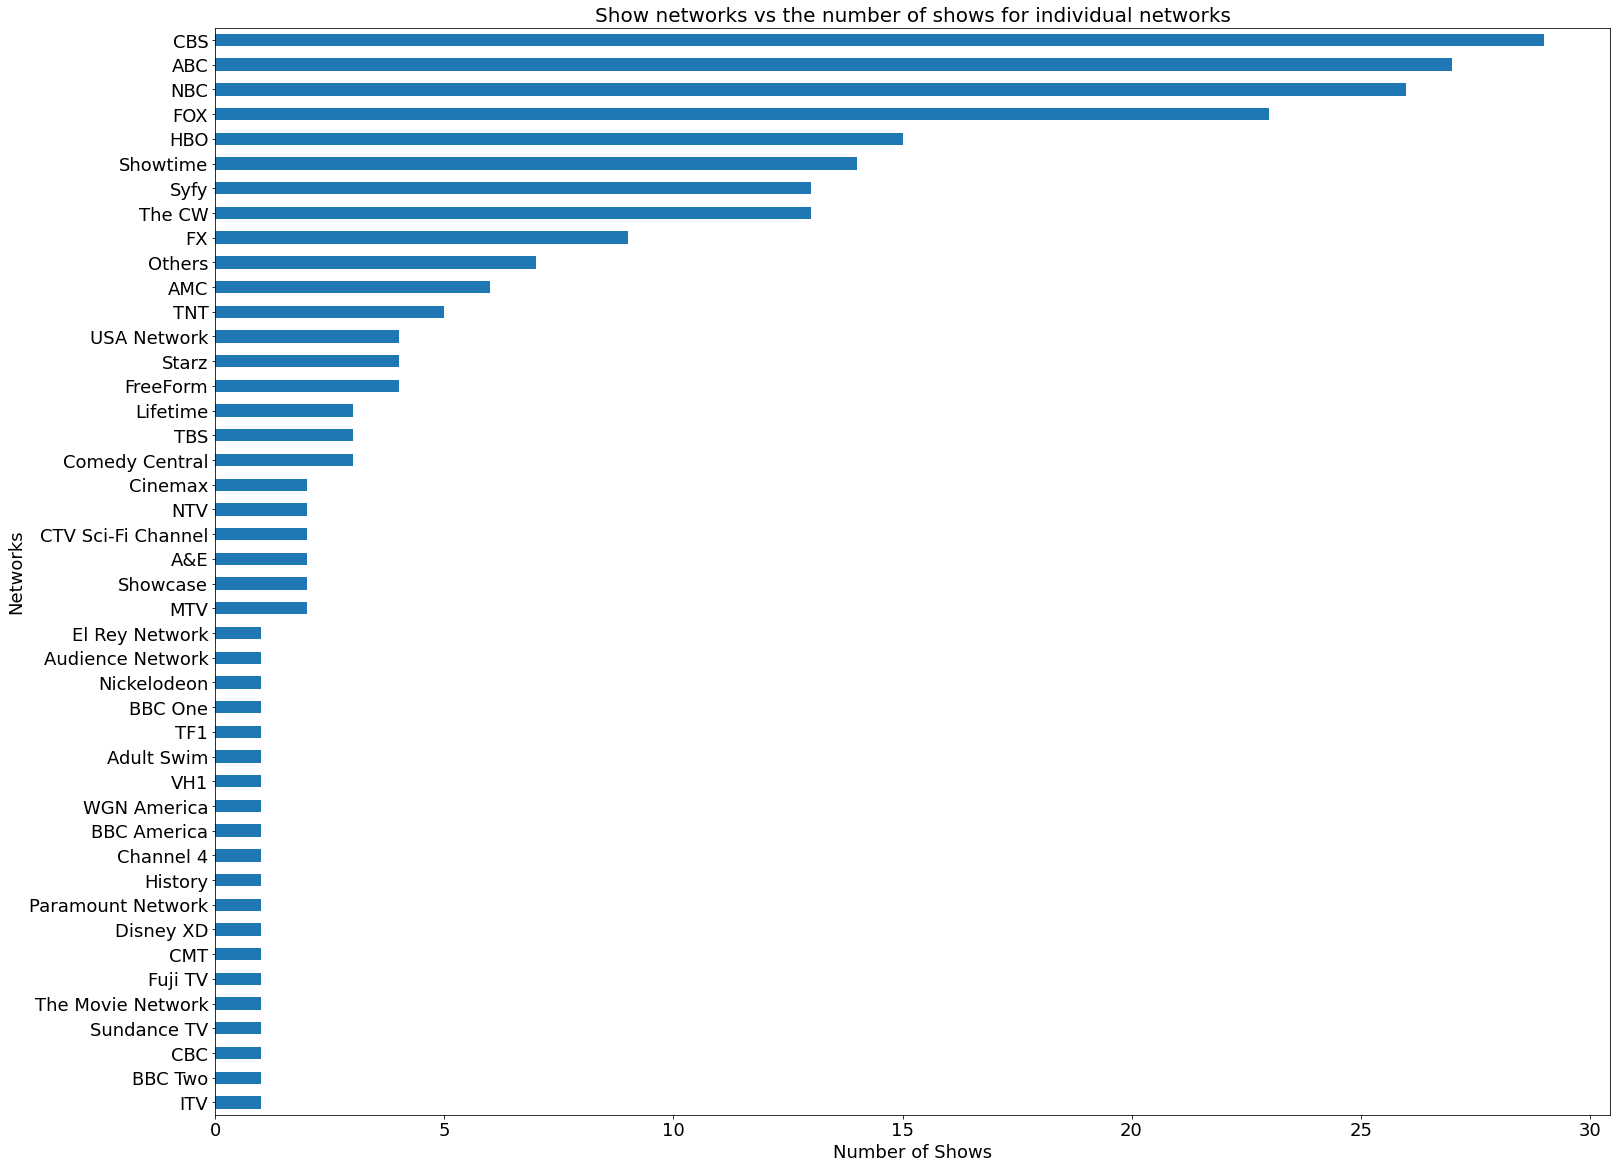

In [33]:
counts = df2["Show_network"].value_counts() 
p = counts.sort_values().plot.barh(figsize=(25,20), fontsize=18) 
p.set_xlabel("Number of Shows",fontsize=18) 
p.set_ylabel("Networks",fontsize=18)
p.set_title("Show networks vs the number of shows for individual networks", fontsize=20)

Maximum number of shows are from **"CBS"** which is **29** out of 240 shows. After that **"ABC"** has the maximum number of shows which is **27**.



Now we want to see what rating most shows have. For this, **"Show_rating_round"** column is used that contains ratings that are rounded off.

Text(0.5, 1.0, 'Percentage of shows for different ratings')

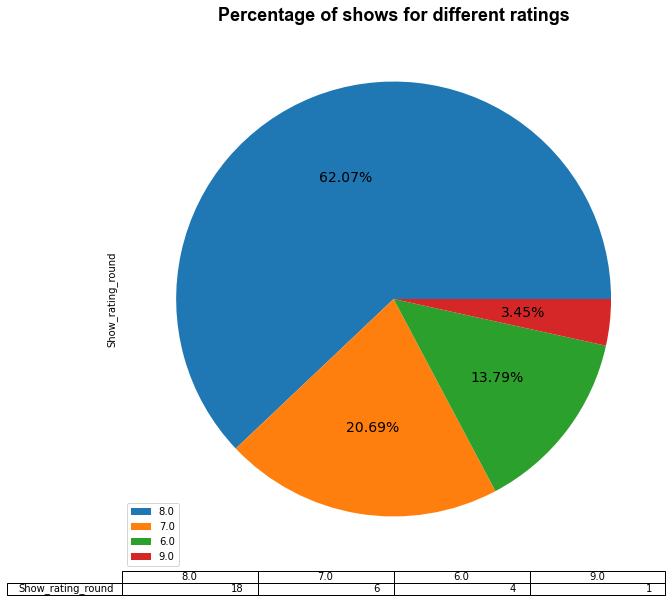

In [34]:
network = df2[(df2["Show_network"] == "CBS")]
counts = network["Show_rating_round"].value_counts() 
plot = counts.plot.pie(figsize=(40, 10), autopct='%.2f%%', fontsize=14, legend = True, table = True, labels=None)
plot.set_title("Percentage of shows for different ratings",fontsize= 18, fontname="Arial", fontweight = "bold")


We can see that **55.17%** of the shows in CBS have a rating of **8** and only **10.34%** have a rating of **9**. 
- Maximum shows on CBS have a rating (rounded off) of 8. The number of shows is 16. 
- Least number of shows have a raiting (rounded off) of 9. The number of shows is 3.

Now we will find the shows that has highest runtime, and has a rating of 8.

Text(0.5, 1.0, 'Runtime of shows in CBS with rating 8')

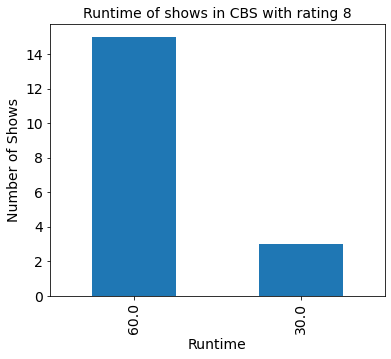

In [35]:
network = df2[(df2["Show_network"] == "CBS")&(df2["Show_rating_round"] == 8)]
counts = network["runtime"].value_counts() 
p = counts.plot.bar(figsize=(6,5), fontsize=14) 
p.set_xlabel("Runtime",fontsize=14) 
p.set_ylabel("Number of Shows",fontsize=14)
p.set_title("Runtime of shows in CBS with rating 8", fontsize=14)

- There are 13 shows from CBS with rating 8 that have a runtime of 60 minutes. 
- The rest 3 shows have a runtime of 30 minutes.

We can list the shows with runtime of 60 and 30 minutes respectively.

In [36]:
network = df2.loc[((df2["Show_network"] == "CBS")&(df2["Show_rating_round"] == 8)&(df2["runtime"]==60)), 'name']

print("The CBS Shows with runtime of 60 minutes and rating of 8 are: \n")
for i in network:
    print("->", i)

The CBS Shows with runtime of 60 minutes and rating of 8 are: 

-> The Amazing Race
-> Hawaii Five-0
-> NCIS: New Orleans
-> Madam Secretary
-> NCIS
-> NCIS: Los Angeles
-> Criminal Minds
-> Stalker
-> Blue Bloods
-> The Good Wife
-> CSI: Crime Scene Investigation
-> Survivor
-> The Mentalist
-> Elementary
-> Vegas


In [37]:
network_2 = df2.loc[((df2["Show_network"] == "CBS")&(df2["Show_rating_round"] == 8)&(df2["runtime"]==30)), 'name']

print("The CBS Shows with runtime of 30 minutes and rating of 8 are: \n")
for i in network_2:
    print("->", i)

The CBS Shows with runtime of 30 minutes and rating of 8 are: 

-> The Big Bang Theory
-> Mom
-> How I Met Your Mother


The **"status"** feature consists of the status of the shows. The show may be running, ended or to be determined.

In [38]:
print("The type of shows:")
print(df2["status"].value_counts())

The type of shows:
Ended               203
Running              34
To Be Determined      3
Name: status, dtype: int64


There is only one show that has the status **"To be Determined"**. 

In [39]:
status = df2.loc[(df2["status"] == "To Be Determined"), 'name']
print("The show with status to be determined \n")
for i in status:
    print("->", i)

The show with status to be determined 

-> True Detective
-> Fargo
-> The Knick


**196** shows have the status ended. This is because they have ended and no new seasons are releasing. Now, we are interested to know which network has the maximum number of highest rated shows with status ended.

Text(0.5, 1.0, 'Network with shows that have ended')

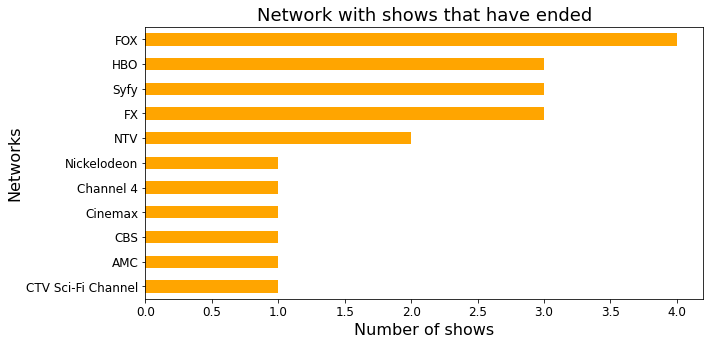

In [40]:
rat_lang = df2[(df2["Show_rating_round"] == 9) & (df2["status"] == "Ended")]
counts = rat_lang["Show_network"].value_counts() 
p = counts.sort_values().plot.barh(figsize=(10,5), fontsize=12, color = "orange") 
p.set_xlabel("Number of shows",fontsize=16) 
p.set_ylabel("Networks",fontsize=16)
p.set_title("Network with shows that have ended", fontsize = 18)


HBO has the 5 shows with rating of 9 (maximum rating) and have ended. After that FOX has 4 shows, with rating of 9 and have ended.

Cinemax, CTV Sci-Fi Channel, Channel 4, NBC and Nickelodeon has the least number of shows, i.e. 1 show, which rating of 9 and has ended.

We can get the list of all the 5 HBO shows.

In [41]:
Net = df2.loc[(df2["Show_rating_round"] == 9) & (df2["status"] == "Ended")&(df2["Show_network"] == "HBO"), 'name']
print("HBO shows with rating 9 that have ended: \n")
for i in Net:
    print("->", i)

HBO shows with rating 9 that have ended: 

-> Game of Thrones
-> The Newsroom
-> The Wire


The shows in the dataset can have one of the two languages, English and Japanese. 4 shows have Japanese langauge and 235 shows have English language. 


In [42]:
lang = df2.loc[(df2["language"] == "Japanese"), 'name']
print("Shows with Japanese language: \n")
for i in lang:
    print("->", i)

Shows with Japanese language: 

-> Hellsing
-> Hellsing Ultimate
-> Berserk
-> Death Note


These are 4 Japanese shows.

Text(0.5, 1.0, 'Premiered dates for the Japanese shows')

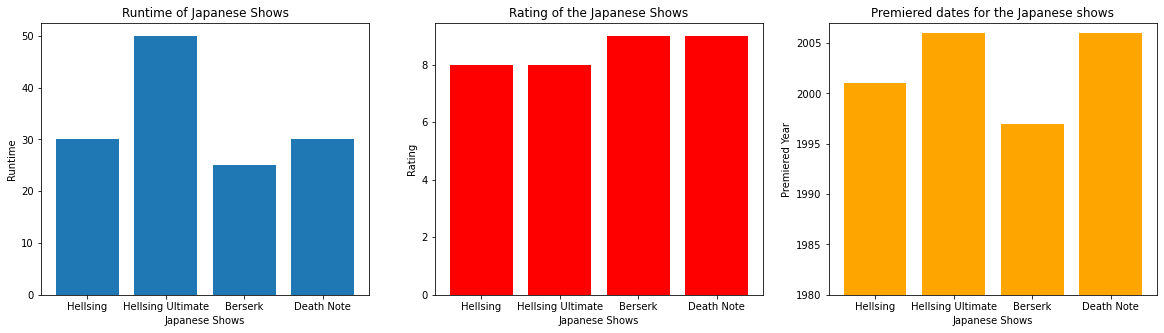

In [43]:
lang = df2[(df2["language"] == "Japanese")]
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
f.set_figheight(5)
f.set_figwidth(20)
ax1.bar(lang["name"],lang["runtime"])
ax1.set_ylabel("Runtime")
ax1.set_xlabel("Japanese Shows")
ax1.set_title("Runtime of Japanese Shows")

plt.ylim(1980,2007)
ax2.bar(lang["name"],lang["Show_rating_round"], color = "red")
ax2.set_ylabel("Rating")
ax2.set_xlabel("Japanese Shows")
ax2.set_title("Rating of the Japanese Shows")

ax3.bar(lang["name"],lang["Show_premiered"], color = "orange")
ax3.set_ylabel("Premiered Year")
ax3.set_xlabel("Japanese Shows")
ax3.set_title("Premiered dates for the Japanese shows")

We have plotted three bar graphs for the Japanese shows.

- **Japnese Shows VS Runtime:** We can see that the maximum runtime is 50 minutes and the minimum runtime is 25 minutes. "Hellsing Ultimate" has the maximum runtime and "Berserk" has minimum runtime.
- **Japnese Shows VS Ratings:** We can see that the shows have on of the two ratings, 8 or 9. "Hellsing" and "Hellsing Ultimate have a rating of 8, whereas "Beserk" and "Death Note" has a rating of 9.
- **Japnese Shows VS Premiered Years:** We can see that out of these 4 shows, the show that was released the first was "Berserk" in 1997. "Hellsing Ultimate" and "Death Note" were released in 2006.


Now considering **English**, we will plot a plot for different type of shows.

Text(0.5, 1.0, 'Type of shows vs number of shows')

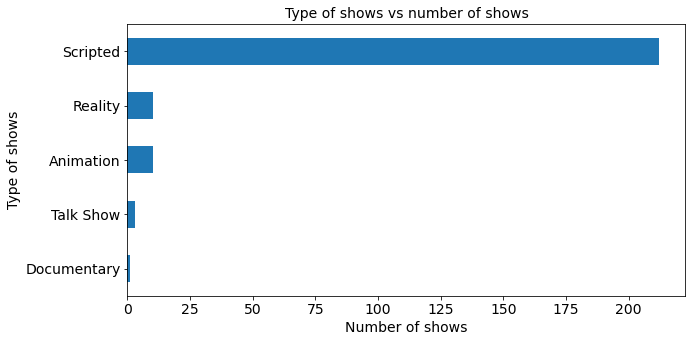

In [44]:
lang_2 = df2[(df2["language"] == "English")]
typ = lang_2["type"].value_counts() 
p = typ.sort_values().plot.barh(figsize=(10,5), fontsize=14) 
p.set_xlabel("Number of shows",fontsize=14) 
p.set_ylabel("Type of shows",fontsize=14)
p.set_title("Type of shows vs number of shows", fontsize=14)

Out of the 4 categories of the type of shows, most of the english shows are scripted. 212 english shows are Scripted and there are only 3 talk shows. 

Only one English show is a documentary.

In [45]:
lang_2 = df2.loc[(df2["language"] == "English")&(df2["type"] == "Documentary"), 'name']
print("English Documentary Show: \n")
for i in lang_2:
    print("->", i)


English Documentary Show: 

-> Long Shadow


Maximum englsih shows are scripted. This means that people prefer scripted shows over any other type of shows.

Text(0.5, 1.0, 'Years vs Number of shows')

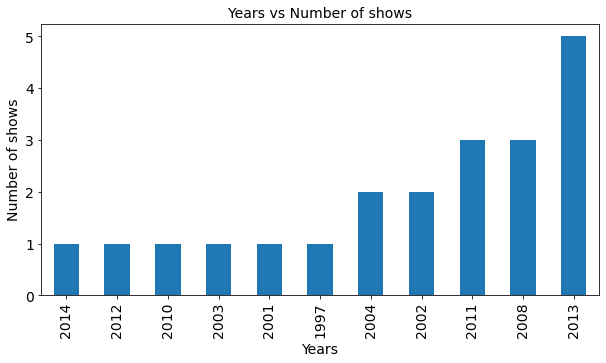

In [46]:
lang_3 = df2[(df2["language"] == "English")&(df2["type"] == "Scripted")& (df2["Show_rating_round"]  == 9)]
date = lang_3["Show_premiered"].value_counts()
p = date.sort_values().plot.bar(figsize=(10,5), fontsize=14) 
p.set_xlabel("Years",fontsize=14) 
p.set_ylabel("Number of shows",fontsize=14)
p.set_title("Years vs Number of shows", fontsize=14)

There are around 27 scripted shows that were rated 9. Out of these 27 shows, maximum shows were released in 2013. 5 shows were released in 2013.
After that, the maximum number of shows were released in 2011, i.e. 4 shows.

Visualising **"premiered"** column using a histogram.
This column contains the full date, including the day and the month, when the show was premiered.

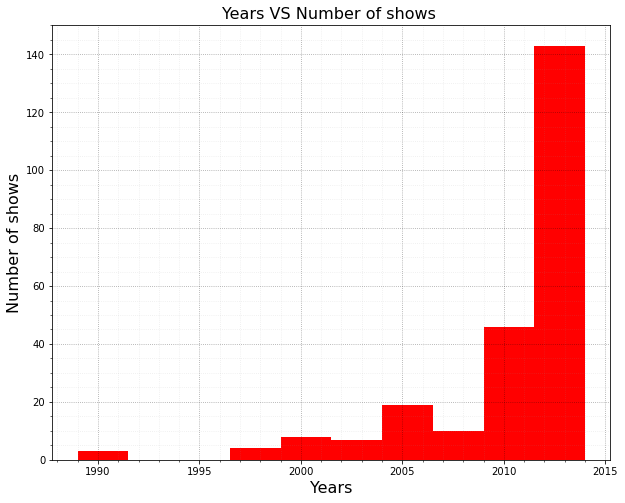

In [47]:
df2['premiered'] = pd.to_datetime(df2['premiered'],infer_datetime_format=True)
plt.clf()
df2['premiered'].map(lambda d: d.year).plot(kind='hist',figsize=(10,8),color ="red")

plt.grid(b=True, which='major', color='black', linestyle=':', alpha=0.4)

plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle=':', alpha=0.2)

plt.xlabel('Years', fontsize=16)
plt.ylabel('Number of shows', fontsize=16)
plt.title('Years VS Number of shows ', fontsize=16)



plt.show()


The peak is from the year 2011 to 2014. This is because the total number of shows released are around 143, which is maximum. This means that the networks released more shows as they were becoming popular in this period. 
From the year 1989 to 1992, the least number of shows were released.
There are no shows from 1992 to 1996.

Text(0.5, 1.0, 'Networks vs number of unique')

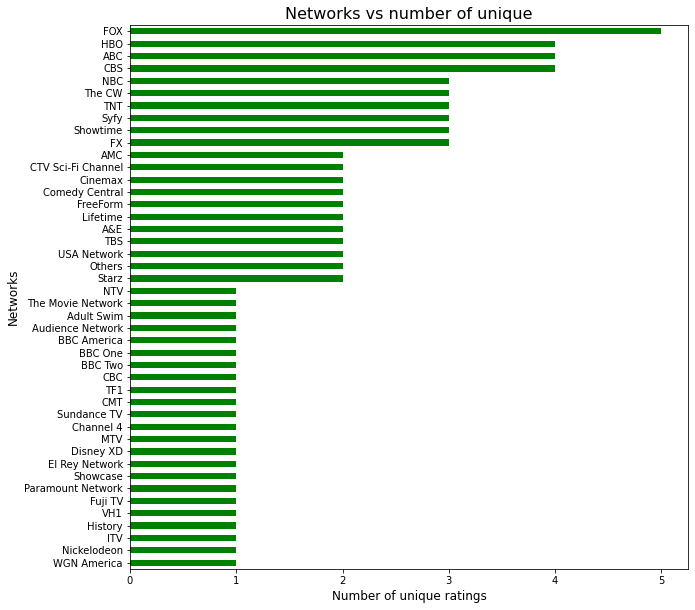

In [48]:
p = df2.groupby('Show_network')['Show_rating_round'].nunique().sort_values().plot(kind='barh', figsize=(10,10), color="green")
p.set_xlabel("Number of unique ratings", fontsize =12)
p.set_ylabel("Networks", fontsize=12)
p.set_title("Networks vs number of unique", fontsize=16)

We get the number of unique rating for each network. The number of unique ratings is maximum for HBO, NBC,NBC and FOX. The maximum number of unique ratings any network can have for this data is 4. This means the shows from these networks have one of the 4 unique ratings. 

## Conclusion and Summary:

Through our analysis, we can see which all shows are popular and which all networks have different shows. CBS network have the maximum number of shows, and miximum number of shows from CBS have been rated 8. It means most shows that have been released over the years are from CBS. Apart from that, we can see that the most of the shows run for 60 minutes. Maximum number of shows have ended, that means no new seasons for the shows are released. From our analysis, we can see that HBO have the maximum shows that have ended with a rating of 9. HBO has one of the most successful shows, Game of Thrones, which is highly rated and has ended. We can also see that most of the shows are scripted, we can infer that most people prefer scripted shows over other types of shows.

**<font color='Red'>Futher Analysis:</font>**

Futher we can also use the location to find what shows are popular in which regions and how do people choose what shows to watch. It can be related to the rating or runtime or genres. We can also analyse the avaergae age groups of people taht watch a perticular genre of shows. 